# ANALYSIS ON SHOPPING TREND DATASET

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
shopping_data = pd.read_csv("shopping_trends.csv")

In [3]:
shopping_data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,NaN,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,NaN,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,NaN,Spring,NaN,Yes,Cash,Free Shipping,NaN,NaN,31,PayPal,Annually


In [4]:
shopping_data.dtypes

Customer ID                   int64
Age                           int64
Gender                       object
Item Purchased               object
Category                     object
Purchase Amount (USD)         int64
Location                     object
Size                         object
Color                        object
Season                       object
Review Rating               float64
Subscription Status          object
Payment Method               object
Shipping Type                object
Discount Applied             object
Promo Code Used              object
Previous Purchases            int64
Preferred Payment Method     object
Frequency of Purchases       object
dtype: object

In [5]:
for column in shopping_data.columns:
    print(shopping_data[column].value_counts())
    print("*"*20)

1       1
2621    1
2593    1
2594    1
2595    1
       ..
1305    1
1306    1
1307    1
1308    1
3900    1
Name: Customer ID, Length: 3900, dtype: int64
********************
69    88
57    87
41    86
25    85
49    84
50    83
54    83
27    83
62    83
32    82
19    81
58    81
42    80
43    79
28    79
31    79
37    77
46    76
29    76
68    75
59    75
63    75
56    74
36    74
55    73
52    73
64    73
35    72
51    72
65    72
40    72
45    72
47    71
66    71
30    71
23    71
38    70
53    70
18    69
21    69
26    69
34    68
48    68
24    68
39    68
70    67
22    66
61    65
60    65
33    63
20    62
67    54
44    51
Name: Age, dtype: int64
********************
Male      2652
Female    1248
Name: Gender, dtype: int64
********************
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt  

In [6]:
shopping_data.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       4
Season                      0
Review Rating               5
Subscription Status         0
Payment Method              4
Shipping Type               0
Discount Applied            3
Promo Code Used             3
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [7]:
#We have missing values in color, review rating, payment method, discount applied and promo code used.All these are categorical variable

In [8]:
shopping_data.duplicated().sum()

0

# Missing Value Handling 

We drop rows with missing values in columns 'color', 'review rating', 'payment method', 'discount applied', and 'promo' since they account for less than 5% of the dataset

In [9]:
shopping_data.dropna(inplace=True)

In [10]:
shopping_data.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

Hence,We have no null values.

In [11]:
pd.crosstab(shopping_data["Discount Applied"],shopping_data["Promo Code Used"])

Promo Code Used,No,Yes
Discount Applied,,
No,2223,0
Yes,0,1667


In [12]:
Discount_Applied1 = shopping_data["Discount Applied"].value_counts().to_frame('Discount Applied')

In [13]:
Promo_Code_Used1 = shopping_data["Promo Code Used"].value_counts().to_frame('Promo Code Used')

In [14]:
Discount_promo = pd.concat([Discount_Applied1, Promo_Code_Used1], axis=1)

In [15]:
Discount_promo

,Discount Applied,Promo Code Used
No,2223,2223
Yes,1667,1667


<AxesSubplot:>

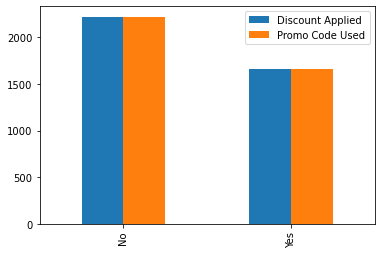

In [16]:
Discount_promo.plot(kind="bar")

# EDA PART (Exploratory Data Analysis)

# Data Understanding

In [17]:
print(shopping_data.shape)

(3890, 19)


In [18]:
# categorical data types
shopping_data.select_dtypes(include="object")

,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Preferred Payment Method,Frequency of Purchases
2,Male,Jeans,Clothing,Massachusetts,S,Maroon,Spring,Yes,Cash,Free Shipping,Yes,Yes,Credit Card,Weekly
3,Male,Sandals,Footwear,Rhode Island,M,Maroon,Spring,Yes,PayPal,Next Day Air,Yes,Yes,PayPal,Weekly
6,Male,Shirt,Clothing,Montana,M,Gray,Fall,Yes,Debit Card,Free Shipping,Yes,Yes,Cash,Quarterly
7,Male,Shorts,Clothing,Louisiana,L,Charcoal,Winter,Yes,Debit Card,Free Shipping,Yes,Yes,Credit Card,Weekly
10,Male,Shoes,Footwear,Arkansas,L,Purple,Fall,Yes,Credit Card,Store Pickup,Yes,Yes,Bank Transfer,Bi-Weekly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,Female,Hoodie,Clothing,Virginia,L,Turquoise,Summer,No,Cash,2-Day Shipping,No,No,Venmo,Weekly
3896,Female,Backpack,Accessories,Iowa,L,White,Spring,No,PayPal,Store Pickup,No,No,Bank Transfer,Bi-Weekly
3897,Female,Belt,Accessories,New Jersey,L,Green,Spring,No,Credit Card,Standard,No,No,Venmo,Quarterly
3898,Female,Shoes,Footwear,Minnesota,S,Brown,Summer,No,PayPal,Express,No,No,Venmo,Weekly


In [19]:
shopping_data.select_dtypes(include=["int","float"])

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
2,3,50,73,3.1,23
3,4,21,90,3.5,49
6,7,63,85,3.2,49
7,8,27,34,3.2,19
10,11,53,34,4.1,26
...,...,...,...,...,...
3895,3896,40,28,4.2,32
3896,3897,52,49,4.5,41
3897,3898,46,33,2.9,24
3898,3899,44,77,3.8,24


Here,Customer ID is column having nominal data type and this is not going to any contribution to our analysis, so we drop this column as well.

In [20]:
shopping_data.drop(columns=["Customer ID"], inplace=True)

In [21]:
print("\nSummary Statistics:")
print(shopping_data.describe())


Summary Statistics:
               Age  Purchase Amount (USD)  Review Rating  Previous Purchases
count  3890.000000            3890.000000    3890.000000         3890.000000
mean     44.087918              59.798715       3.750746           25.360925
std      15.202600              23.681630       0.715879           14.440871
min      18.000000              20.000000       2.500000            1.000000
25%      31.000000              39.000000       3.100000           13.000000
50%      44.000000              60.000000       3.800000           25.000000
75%      57.000000              81.000000       4.400000           38.000000
max      70.000000             100.000000       5.000000           50.000000


In [22]:
# correlation among the variables 
numerical_columns = shopping_data.select_dtypes(include=["int", "float"]).columns
shopping_data[numerical_columns].corr()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
Age,1.000000,-0.010497,-0.023645,0.040638
Purchase Amount (USD),-0.010497,1.000000,0.031506,0.008208
Review Rating,-0.023645,0.031506,1.000000,0.003777
Previous Purchases,0.040638,0.008208,0.003777,1.000000


# Univariate Analysis

# Distribution of Categorical columns

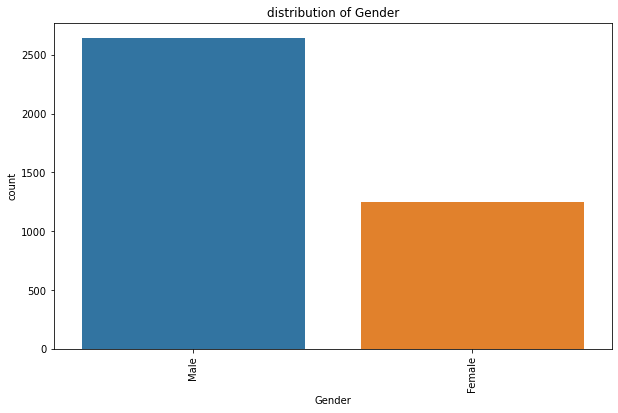

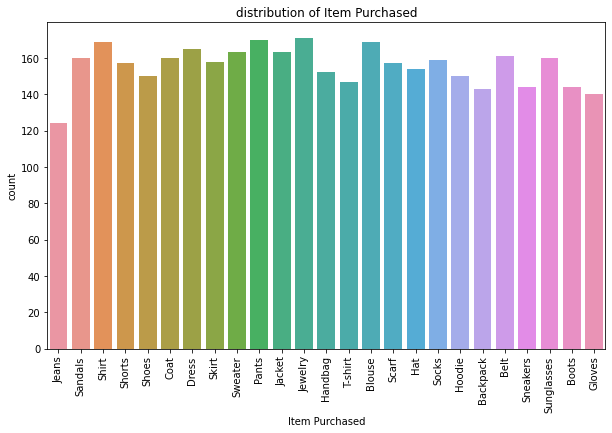

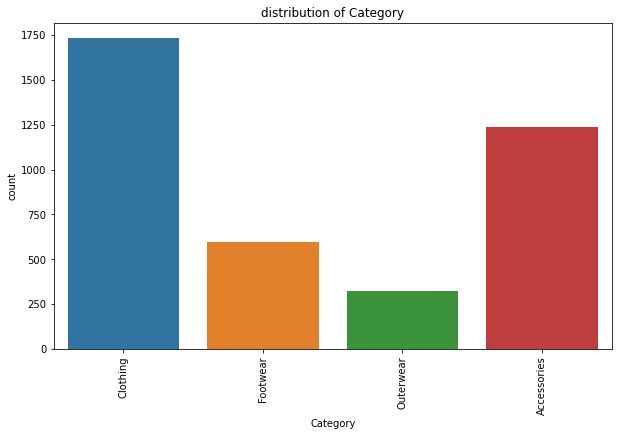

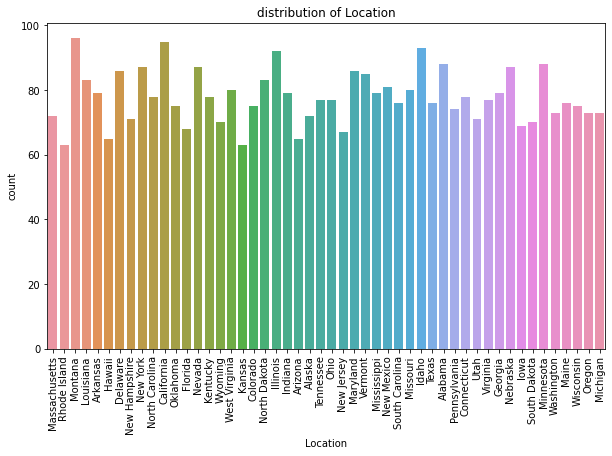

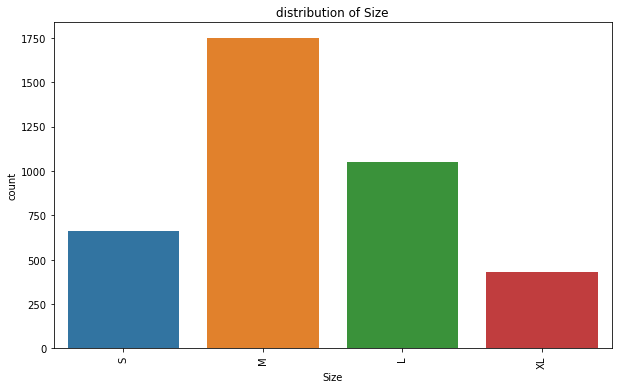

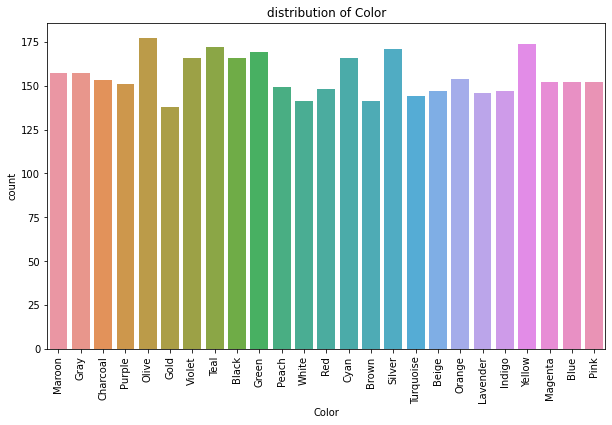

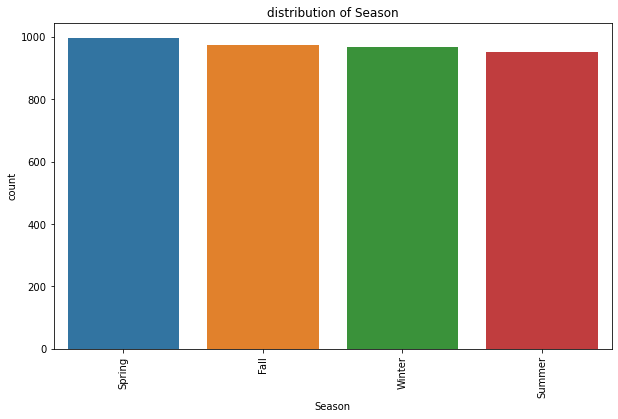

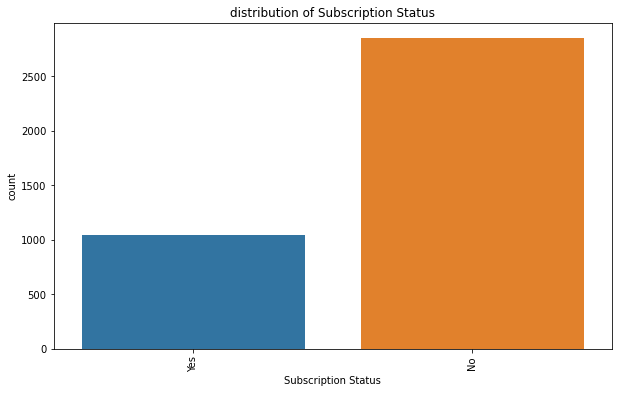

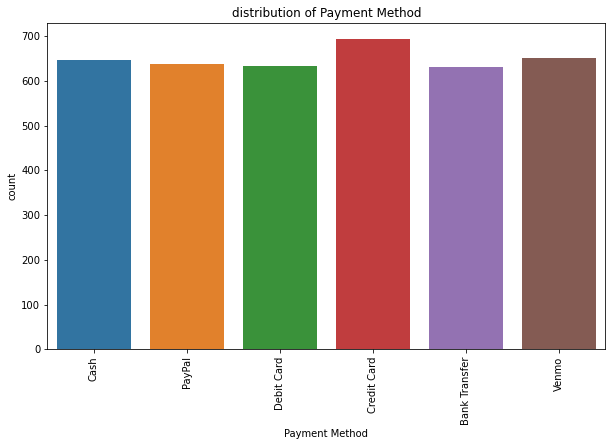

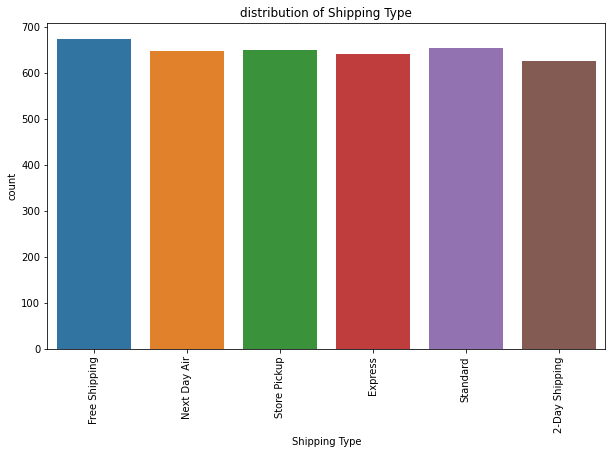

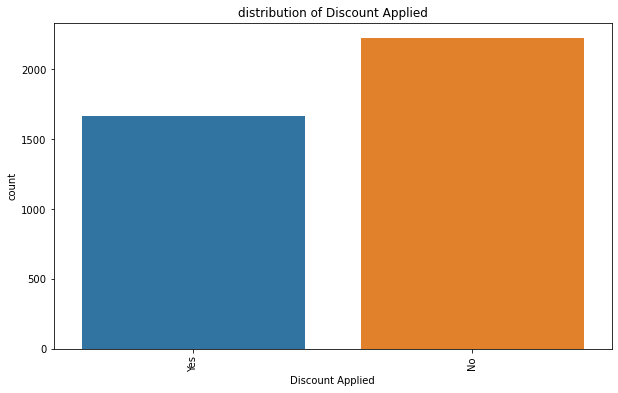

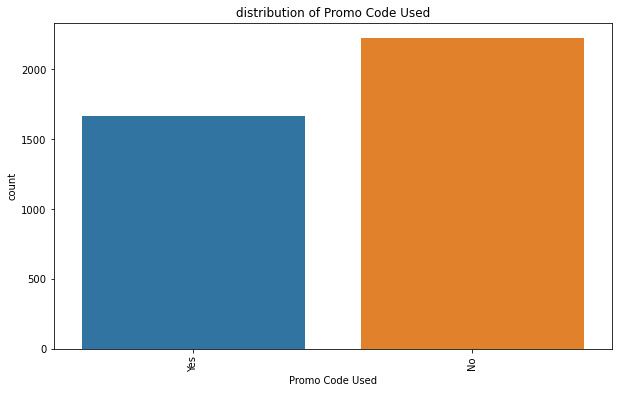

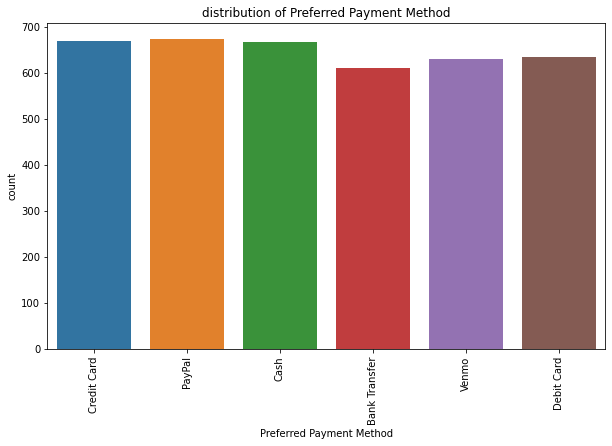

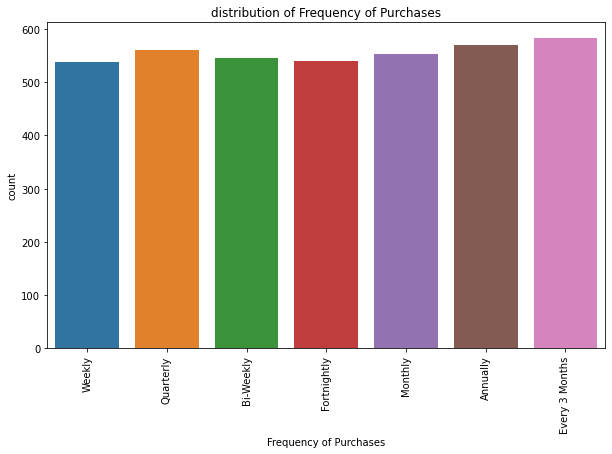

In [23]:
# Using Bar chart
for column in shopping_data.select_dtypes(include=["object"]).columns:
    plt.figure(figsize=(10,6))
    sns.countplot(data=shopping_data, x=column)
    plt.title(f'distribution of {column}')
    plt.xticks(rotation="vertical")
    plt.show()


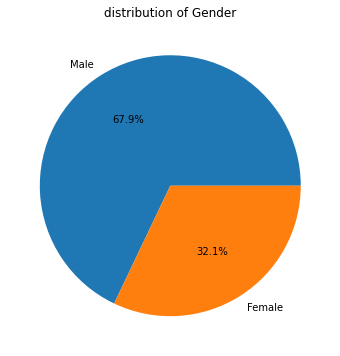

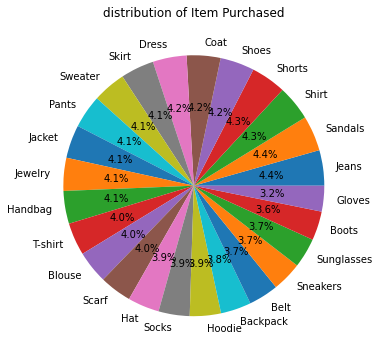

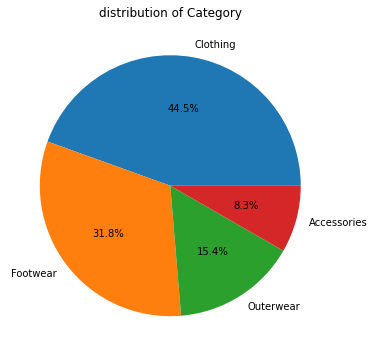

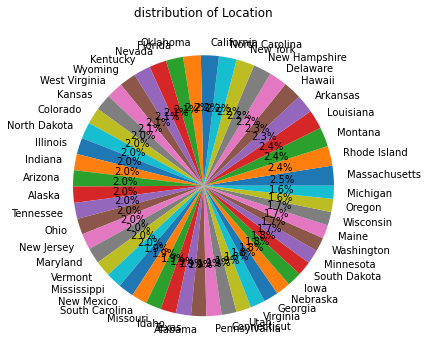

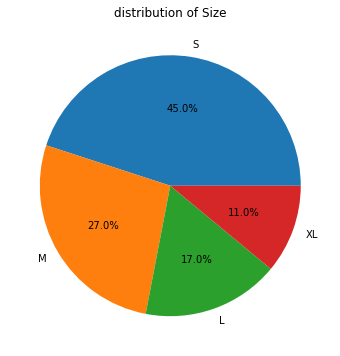

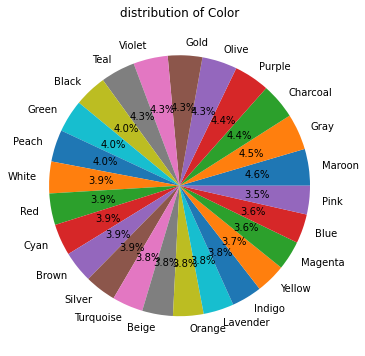

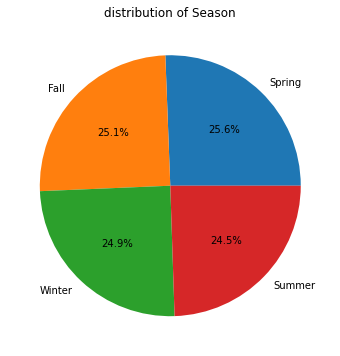

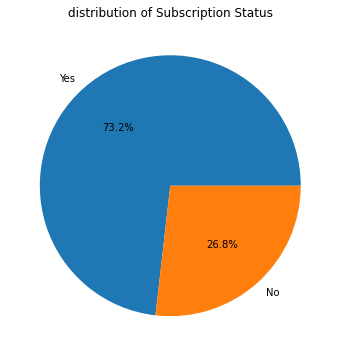

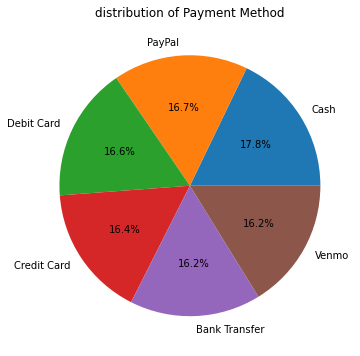

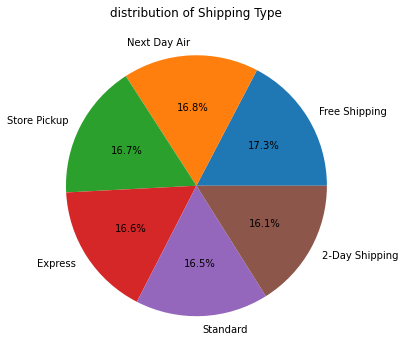

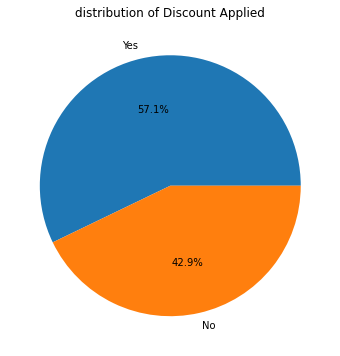

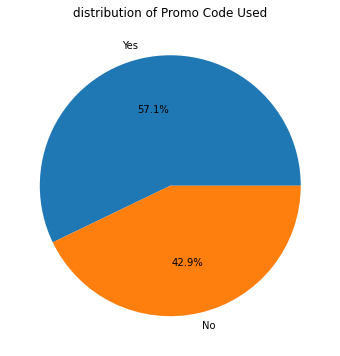

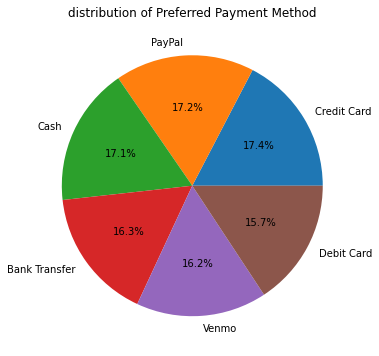

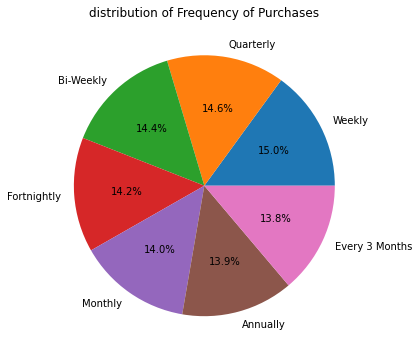

In [24]:
# using pie plot
for column in shopping_data.select_dtypes(include=["object"]).columns:
    plt.figure(figsize=(10,6))
    plt.pie(shopping_data[column].value_counts(), labels= shopping_data[column].unique(), autopct='%1.1f%%')
    plt.title(f'distribution of {column}')
    plt.show() 

# Distribution of Numerical columns

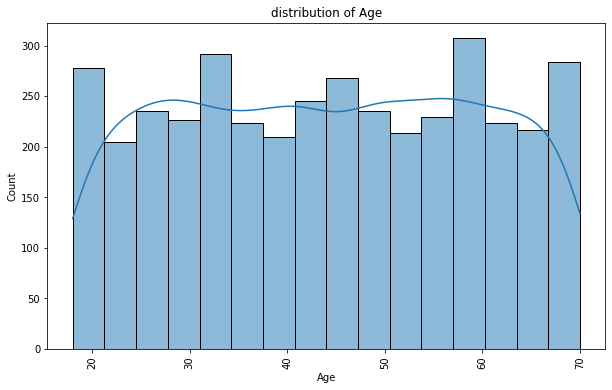

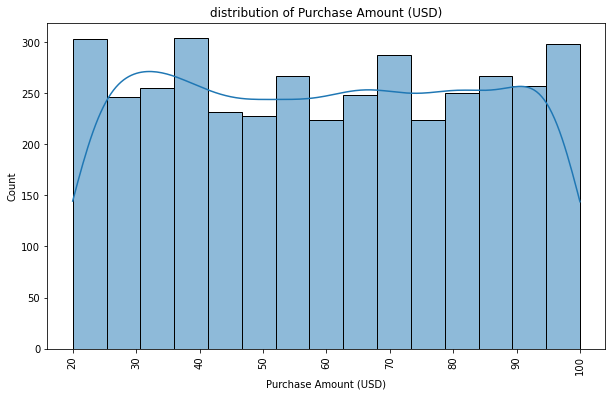

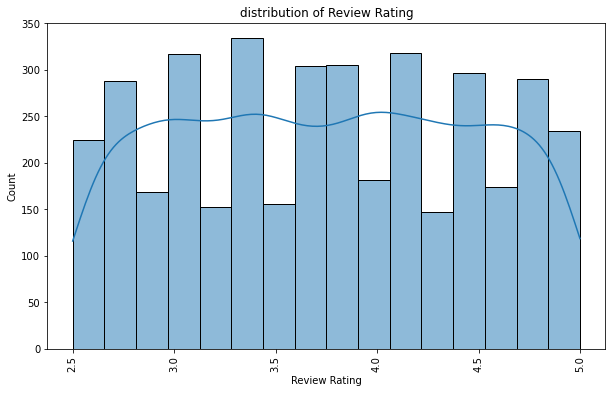

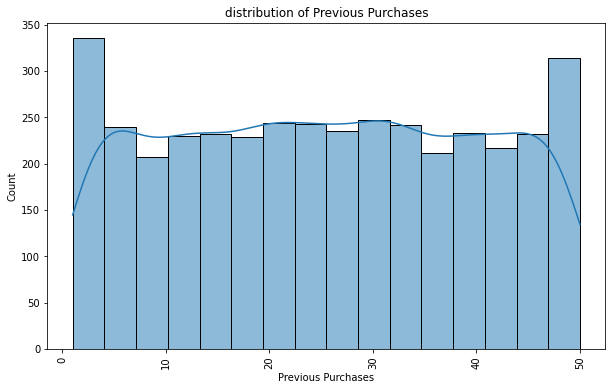

In [25]:
# using histogram
for column in shopping_data.select_dtypes(include=["int", "float"]).columns:
    plt.figure(figsize=(10,6))
    sns.histplot(data=shopping_data, x=column, kde=True)
    plt.title(f'distribution of {column}')
    plt.xticks(rotation="vertical")
    plt.show()

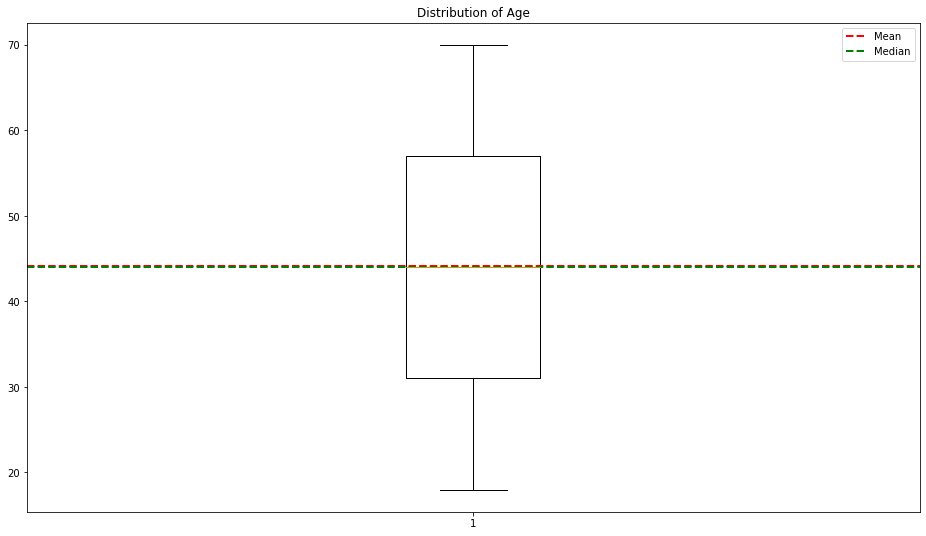

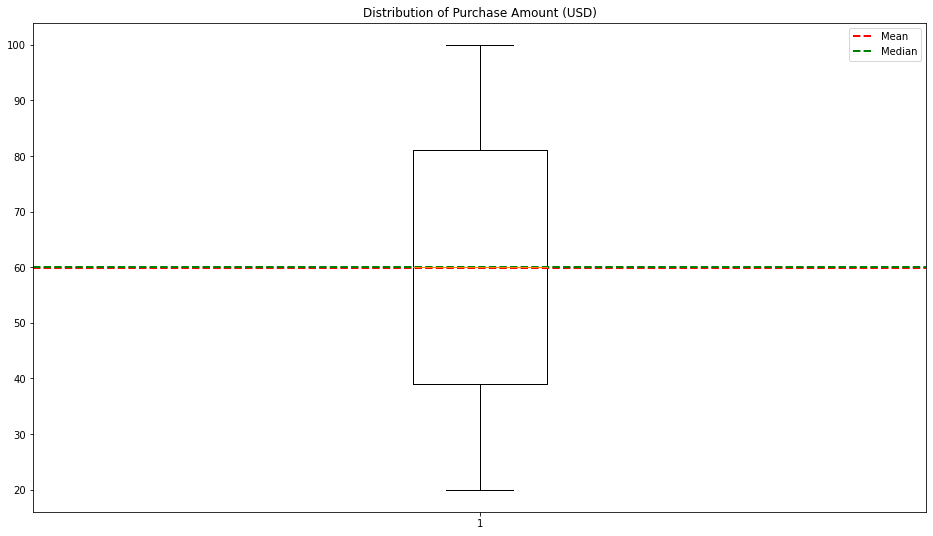

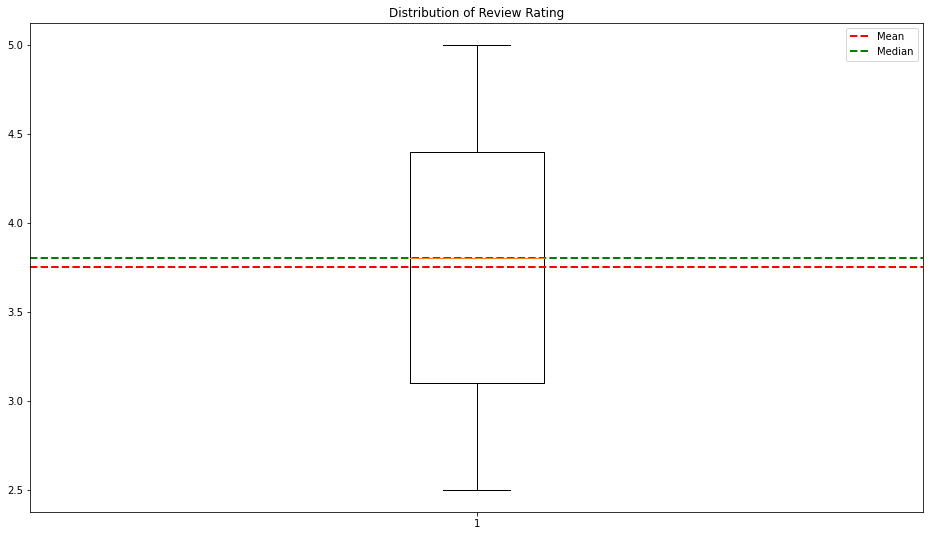

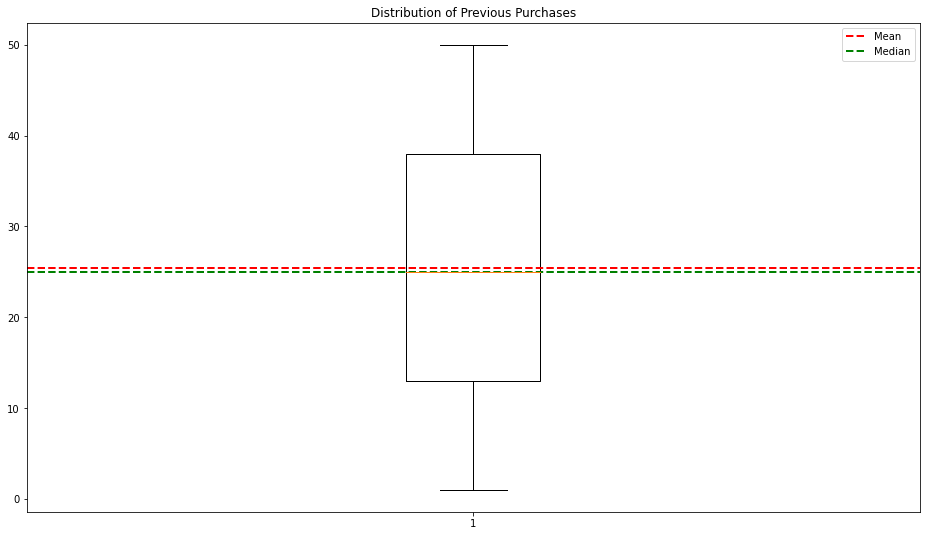

In [26]:
# using boxplot
for column in shopping_data.select_dtypes(include=["int","float"]).columns:
    plt.figure(figsize=(16,9))
    plt.boxplot(shopping_data[column], vert=True)
    plt.title(f'Distribution of {column}')
    
    # Add annotations
    plt.axhline(shopping_data[column].mean(), color='r', linestyle='dashed', linewidth=2, label='Mean')
    plt.axhline(shopping_data[column].median(), color='g', linestyle='dashed', linewidth=2, label='Median')
    plt.legend()
    
    plt.show()


In [27]:
print(shopping_data["Age"].describe())

count    3890.000000
mean       44.087918
std        15.202600
min        18.000000
25%        31.000000
50%        44.000000
75%        57.000000
max        70.000000
Name: Age, dtype: float64


In [28]:
shopping_data["Age_category"] = pd.cut(shopping_data["Age"], bins =[0,18,40,60,90], labels=["child","young_adult", "midddle_aged","senior_adult"])

In [29]:
print(shopping_data["Purchase Amount (USD)"].describe())

count    3890.000000
mean       59.798715
std        23.681630
min        20.000000
25%        39.000000
50%        60.000000
75%        81.000000
max       100.000000
Name: Purchase Amount (USD), dtype: float64


In [30]:
shopping_data['Purchase_Category'] = pd.cut(shopping_data['Purchase Amount (USD)'], 
                                            bins=[0, 20, 40, 60, 80, 100], 
                                            labels=['Low', 'Moderate', 'Medium', 'High', 'Very High'])


In [31]:
print(shopping_data["Previous Purchases"].describe())

count    3890.000000
mean       25.360925
std        14.440871
min         1.000000
25%        13.000000
50%        25.000000
75%        38.000000
max        50.000000
Name: Previous Purchases, dtype: float64


In [32]:
shopping_data['Previous_Purchases_Category'] = pd.qcut(shopping_data['Previous Purchases'], 
                                                       q=4, 
                                                       labels=['Low', 'Moderate', 'High', 'Very High'])


In [33]:
shopping_data["Review Rating"] = shopping_data["Review Rating"].astype("float", errors="ignore")

In [34]:
# print(shopping_data[shopping_data["Review Rating"]=="No"].count())

In [35]:
shopping_data = shopping_data[pd.to_numeric(shopping_data['Review Rating'], errors='coerce').notnull()]

shopping_data['Review Rating'] = pd.to_numeric(shopping_data['Review Rating'])

shopping_data['Review_Rating_Category'] = pd.cut(shopping_data['Review Rating'], 
                                                 bins=[0, 2, 3, 4, 5], 
                                                 labels=['Poor', 'Average', 'Good', 'Excellent'])


In [36]:
shopping_data.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,...,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Age_category,Purchase_Category,Previous_Purchases_Category,Review_Rating_Category
2,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,...,Free Shipping,Yes,Yes,23,Credit Card,Weekly,midddle_aged,High,Moderate,Good
3,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,...,Next Day Air,Yes,Yes,49,PayPal,Weekly,young_adult,Very High,Very High,Good
6,63,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.2,...,Free Shipping,Yes,Yes,49,Cash,Quarterly,senior_adult,Very High,Very High,Good
7,27,Male,Shorts,Clothing,34,Louisiana,L,Charcoal,Winter,3.2,...,Free Shipping,Yes,Yes,19,Credit Card,Weekly,young_adult,Moderate,Moderate,Good
10,53,Male,Shoes,Footwear,34,Arkansas,L,Purple,Fall,4.1,...,Store Pickup,Yes,Yes,26,Bank Transfer,Bi-Weekly,midddle_aged,Moderate,High,Excellent


In [37]:
shopping_data.dtypes

Age                               int64
Gender                           object
Item Purchased                   object
Category                         object
Purchase Amount (USD)             int64
Location                         object
Size                             object
Color                            object
Season                           object
Review Rating                   float64
Subscription Status              object
Payment Method                   object
Shipping Type                    object
Discount Applied                 object
Promo Code Used                  object
Previous Purchases                int64
Preferred Payment Method         object
Frequency of Purchases           object
Age_category                   category
Purchase_Category              category
Previous_Purchases_Category    category
Review_Rating_Category         category
dtype: object

In [38]:
shopping_data["Age_category"] = pd.cut(shopping_data["Age"], bins =[0,18,40,60,90], labels=["child","young_adult", "midddle_aged","senior_adult"])

In [39]:
shopping_data['Review_Rating_Category'] = pd.cut(shopping_data['Review Rating'], 
                                                 bins=[0, 2, 3, 4, 5], 
                                                 labels=['Poor', 'Average', 'Good', 'Excellent'])


# Here, We are going to answer few questions:
# 1. Is there a relationship between age and purchase amount?

Correlation Coefficient: -0.010497020457115033


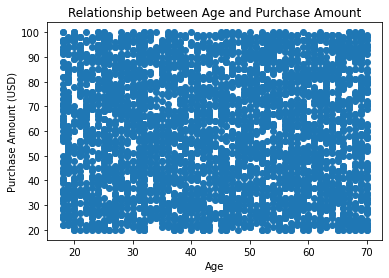

In [40]:
correlation_coefficient = shopping_data['Age'].corr(shopping_data['Purchase Amount (USD)'])
print('Correlation Coefficient:', correlation_coefficient)

# Scatter plot
import matplotlib.pyplot as plt
plt.scatter(shopping_data['Age'], shopping_data['Purchase Amount (USD)'])
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.title('Relationship between Age and Purchase Amount')
plt.show()


# 2. Do males or females tend to make more purchases?


Male      2642
Female    1248
Name: Gender, dtype: int64


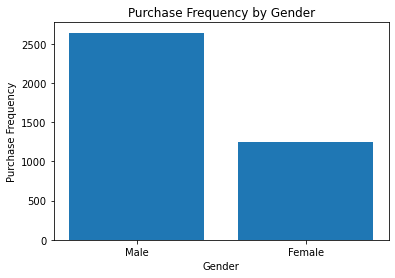

T-statistic: -0.815388942233062
P-value: 0.4148996577679148
Fail to reject the null hypothesis: There is no significant difference in purchase frequency between males and females.


In [41]:
purchase_frequency = shopping_data['Gender'].value_counts()
print(purchase_frequency)

import matplotlib.pyplot as plt
plt.bar(purchase_frequency.index, purchase_frequency.values)
plt.xlabel('Gender')
plt.ylabel('Purchase Frequency')
plt.title('Purchase Frequency by Gender')
plt.show()

# T-tests
male_purchases = shopping_data[shopping_data['Gender'] == 'Male']['Purchase Amount (USD)']
female_purchases = shopping_data[shopping_data['Gender'] == 'Female']['Purchase Amount (USD)']

from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(male_purchases, female_purchases)
print('T-statistic:', t_stat)
print('P-value:', p_value)

if p_value < 0.05:
    print('Reject the null hypothesis: There is a significant difference in purchase frequency between males and females.')
else:
    print('Fail to reject the null hypothesis: There is no significant difference in purchase frequency between males and females.')


# 3. Are there any differences in purchase behaviour between different age categories?


young_adult     1601
midddle_aged    1498
senior_adult     723
child             68
Name: Age_category, dtype: int64


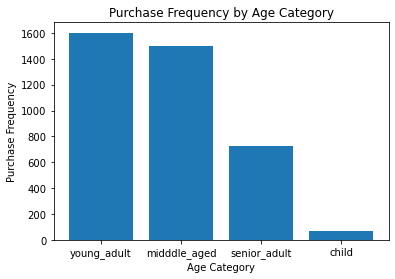

F-statistic: 0.1104258626123009
P-value: 0.9540370232431081
Fail to reject the null hypothesis: There are no significant differences in purchase behavior between age categories.


In [42]:
# Frequency tables
age_categories = shopping_data['Age_category'].value_counts()
print(age_categories)

# Bar charts
import matplotlib.pyplot as plt
plt.bar(age_categories.index, age_categories.values)
plt.xlabel('Age Category')
plt.ylabel('Purchase Frequency')
plt.title('Purchase Frequency by Age Category')
plt.show()

# ANOVA
from scipy.stats import f_oneway

age_groups = []
for category in shopping_data['Age_category'].unique():
    age_group = shopping_data[shopping_data['Age_category'] == category]['Purchase Amount (USD)']
    age_groups.append(age_group)

f_stat, p_value = f_oneway(*age_groups)
print('F-statistic:', f_stat)
print('P-value:', p_value)

if p_value < 0.05:
    print('Reject the null hypothesis: There are significant differences in purchase behavior between age categories.')
else:
    print('Fail to reject the null hypothesis: There are no significant differences in purchase behavior between age categories.')



# 4. Which categories of products are most popular among customers?


Clothing       1731
Accessories    1238
Footwear        598
Outerwear       323
Name: Category, dtype: int64


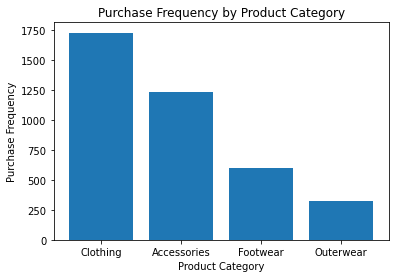

In [43]:
product_categories = shopping_data['Category'].value_counts()
print(product_categories)

# Bar charts
import matplotlib.pyplot as plt
plt.bar(product_categories.index, product_categories.values)
plt.xlabel('Product Category')
plt.ylabel('Purchase Frequency')
plt.title('Purchase Frequency by Product Category')
plt.show()


# 5. Is there a relationship between purchase amount and frequency of purchases?


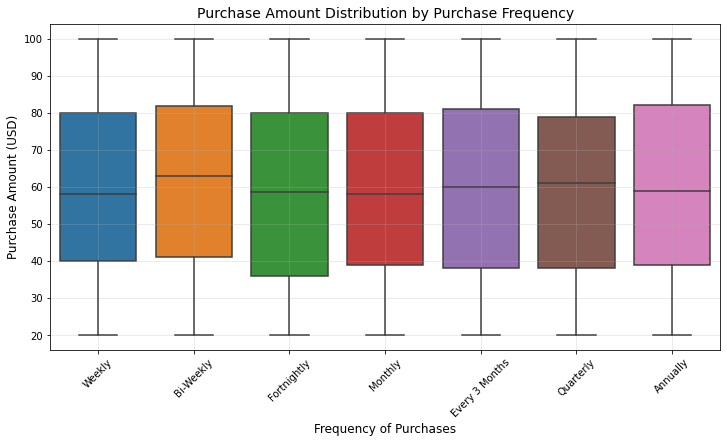


ANOVA Results:
F-statistic: 0.413
P-value: 0.8709
No statistically significant differences between groups (p ≥ 0.05)


In [44]:
# Convert frequency to ordered categorical for better visualization
freq_order = ['Weekly', 'Bi-Weekly', 'Fortnightly', 'Monthly', 
              'Every 3 Months', 'Quarterly', 'Annually']
shopping_data['Frequency of Purchases'] = pd.Categorical(
    shopping_data['Frequency of Purchases'],
    categories=freq_order,
    ordered=True
)


plt.figure(figsize=(12, 6))
sns.boxplot(x='Frequency of Purchases', y='Purchase Amount (USD)', data=shopping_data)
plt.title('Purchase Amount Distribution by Purchase Frequency', fontsize=14)
plt.xlabel('Frequency of Purchases', fontsize=12)
plt.ylabel('Purchase Amount (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

## Statistical Analysis (ANOVA)
from scipy.stats import f_oneway

groups = []
for freq in freq_order:
    groups.append(shopping_data[shopping_data['Frequency of Purchases'] == freq]['Purchase Amount (USD)'])

# Perform ANOVA
f_stat, p_value = f_oneway(*groups)
print(f"\nANOVA Results:")
print(f"F-statistic: {f_stat:.3f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Statistically significant differences between groups (p < 0.05)")
    # Post-hoc test if ANOVA is significant
    from statsmodels.stats.multicomp import pairwise_tukeyhsd
    tukey = pairwise_tukeyhsd(endog=shopping_data['Purchase Amount (USD)'],
                             groups=shopping_data['Frequency of Purchases'],
                             alpha=0.05)
    print("\nPost-hoc Tukey HSD Test:")
    print(tukey)
else:
    print("No statistically significant differences between groups (p ≥ 0.05)")


# 6. Is there a relationship between review ratings and purchase amount?

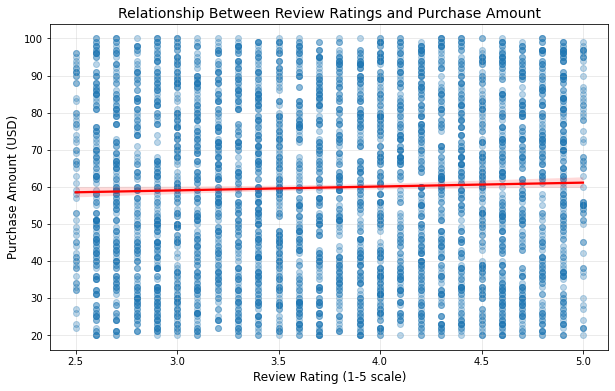

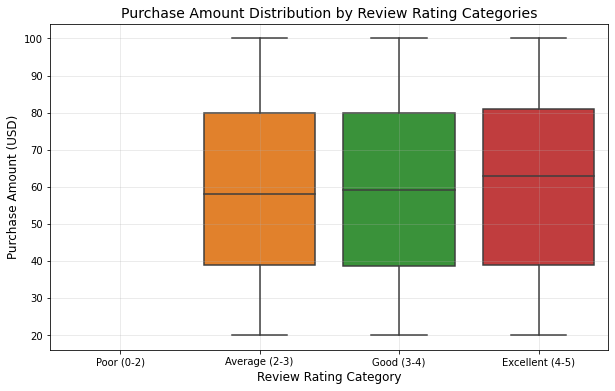

Pearson Correlation: 0.032
P-value: 0.0494
Statistically significant relationship (p < 0.05)


In [45]:
import seaborn as sns
from scipy.stats import pearsonr



plt.figure(figsize=(10, 6))
sns.regplot(x='Review Rating', y='Purchase Amount (USD)', data=shopping_data, 
            scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Relationship Between Review Ratings and Purchase Amount', fontsize=14)
plt.xlabel('Review Rating (1-5 scale)', fontsize=12)
plt.ylabel('Purchase Amount (USD)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()


shopping_data['Rating_Category'] = pd.cut(shopping_data['Review Rating'], 
                                        bins=[0, 2, 3, 4, 5],
                                        labels=['Poor (0-2)', 'Average (2-3)', 
                                                'Good (3-4)', 'Excellent (4-5)'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='Rating_Category', y='Purchase Amount (USD)', data=shopping_data)
plt.title('Purchase Amount Distribution by Review Rating Categories', fontsize=14)
plt.xlabel('Review Rating Category', fontsize=12)
plt.ylabel('Purchase Amount (USD)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()


corr, p_value = pearsonr(shopping_data['Review Rating'], shopping_data['Purchase Amount (USD)'])
print(f"Pearson Correlation: {corr:.3f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Statistically significant relationship (p < 0.05)")
else:
    print("No statistically significant relationship (p ≥ 0.05)")

The correlation coefficient of 0.031027533218915746 indicates a very weak positive relationship between review ratings and purchase amount. This means that as review ratings increase, purchase amount tends to increase, but the relationship is not very strong.
P-Value
The p-value of 0.05283452434882229 is slightly above the typical significance level of 0.05. This means that the observed correlation is not statistically significant.


# 7.Which product have higher Review Rating

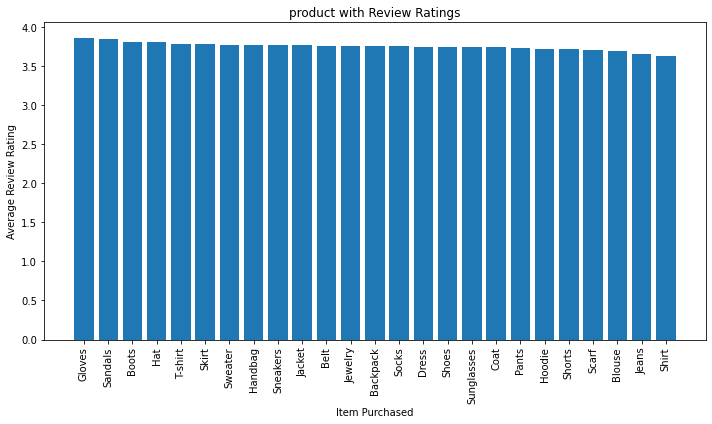

In [46]:
product_ratings = shopping_data.groupby('Item Purchased')['Review Rating'].mean().reset_index()
product_ratings = product_ratings.sort_values(by='Review Rating', ascending=False)
plt.figure(figsize=(10,6))
plt.bar(product_ratings['Item Purchased'], product_ratings['Review Rating'])
plt.xlabel('Item Purchased')
plt.ylabel('Average Review Rating')
plt.title('product with Review Ratings')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 8. Is there any relationship between promo code usage and discount applied?

In [47]:
# Create a contingency table
contingency_table = pd.crosstab(shopping_data['Promo Code Used'], shopping_data['Discount Applied'])
print(contingency_table)
from scipy.stats import chi2_contingency

# Perform a chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Chi-Square Statistic: {chi2}')
print(f'p-value: {p}')


Discount Applied    No   Yes
Promo Code Used             
No                2223     0
Yes                  0  1667
Chi-Square Statistic: 3885.9176507820594
p-value: 0.0


There is a strong association between promo code usage and discount applied.
The use of promo codes is  linked to the application of discounts.
The chi-square test confirms that therea statistically significant relationship between promo code usage and discount applied.


# Hence, Those who used promocode also got discount